In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("figures", exist_ok=True)
sns.set(style="whitegrid")


In [4]:
# WARNING: ONLY RUN ONCE OR DATA WILL BE ERASED 

# Instance datasets
train_file = pd.read_csv('dataset/train.csv', sep=',', header=0)
test_file = pd.read_csv('dataset/validation.csv', sep=',', header=0)
anime_file = pd.read_csv('dataset/anime.csv', sep=',', header=0)

train_file.to_csv("dataset/train.csv", index=False, header=False)  # Remove 1st row from CSV
test_file.to_csv("dataset/validation.csv", index=False, header=False)
anime_file.to_csv("dataset/anime.csv", index=False, header=False)

train_file = pd.read_csv('dataset/train.csv', names = ['user_id','item_id','rating'] ,sep=',', header=0)
test_file = pd.read_csv('dataset/validation.csv', names = ['user_id','item_id','rating'], sep=',', header=0)
anime_file = pd.read_csv('dataset/anime.csv', names = ['anime_id','name','genre','type','episodes','rating','members'], sep=',', header=0)

In [7]:
def count_ratings(df, name):
    total = len(df)
    valid = (df['rating'] != -1).sum()
    invalid = (df['rating'] == -1).sum()
    print(f"{name}:")
    print(f"- Total rows: {total}")
    print(f"- Rated Items: {valid}")
    print(f"- Unrated Items (-1): {invalid}")
    print(f"- Unrated Pecentage: {invalid / total * 100:.2f}%")
    print()

count_ratings(train_file, "Train File")
count_ratings(test_file, "Test File")


Train File:
- Total rows: 27399
- Rated Items: 22237
- Unrated Items (-1): 5162
- Unrated Pecentage: 18.84%

Test File:
- Total rows: 2311
- Rated Items: 1865
- Unrated Items (-1): 446
- Unrated Pecentage: 19.30%



In [ ]:
def most_rated_vs_missing(df, anime_file, name):
    df_invalid = df[df['rating'] == -1]
    df_valid = df[df['rating'] != -1]

    most_missing = df_invalid['item_id'].value_counts().idxmax()
    missing_count = df_invalid['item_id'].value_counts().max()

    most_rated = df_valid['item_id'].value_counts().idxmax()
    rated_count = df_valid['item_id'].value_counts().max()

    total_missing = df[df['item_id'] == most_missing].shape[0]
    total_rated = df[df['item_id'] == most_rated].shape[0]

    name_missing = anime_file[anime_file['anime_id'] == most_missing]['name'].values[0]
    name_rated = anime_file[anime_file['anime_id'] == most_rated]['name'].values[0]

    # Prettify :)
    print(f"{name}:")
    print(f"- Most unrated anime: {name_missing} (ID: {most_missing})")
    print(f"    • Ratings missing: {missing_count}")
    print(f"    • Total appearances: {total_missing}")
    print()
    print(f"- Most rated anime: {name_rated} (ID: {most_rated})")
    print(f"    • Ratings given: {rated_count}")
    print(f"    • Total appearances: {total_rated}")
    print()

most_rated_vs_missing(train_file, anime_file, "Train File")
most_rated_vs_missing(test_file, anime_file, "Test File")

Train File:
- Most unrated anime: Death Note (ID: 1535)
    • Ratings missing: 25
    • Total appearances: 146

- Most rated anime: Death Note (ID: 1535)
    • Ratings given: 121
    • Total appearances: 146

Test File:
- Most unrated anime: Death Note (ID: 1535)
    • Ratings missing: 4
    • Total appearances: 10

- Most rated anime: Code Geass: Hangyaku no Lelouch R2 (ID: 2904)
    • Ratings given: 11
    • Total appearances: 12



In [18]:
# Cleaning of those -1
train_clean = train_file[train_file['rating'] != -1].copy()
test_clean = test_file[test_file['rating'] != -1].copy()

print("Size before cleaning:")
print(f"- Train: {train_file.shape}")
print(f"- Test: {test_file.shape}")
print()
print("Size after cleaning:")
print(f"- Train: {train_clean.shape}")
print(f"- Test: {test_clean.shape}")

Size before cleaning:
- Train: (27399, 3)
- Test: (2311, 3)

Size after cleaning:
- Train: (22237, 3)
- Test: (1865, 3)


Train File - Item Statistics
Total unique items rated: 3543
Average number of ratings per item: 6.28
Median number of ratings per item: 3.0
Max ratings for a single item: 121



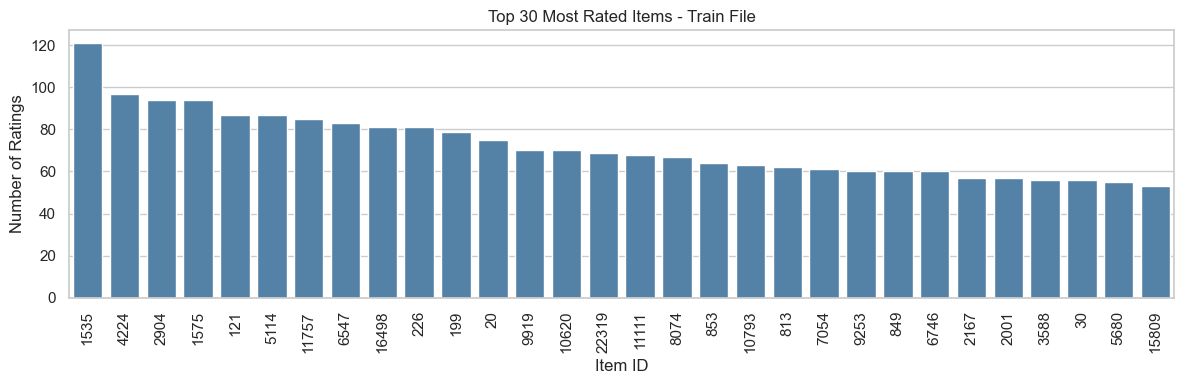

Test File - Item Statistics
Total unique items rated: 1233
Average number of ratings per item: 1.51
Median number of ratings per item: 1.0
Max ratings for a single item: 11



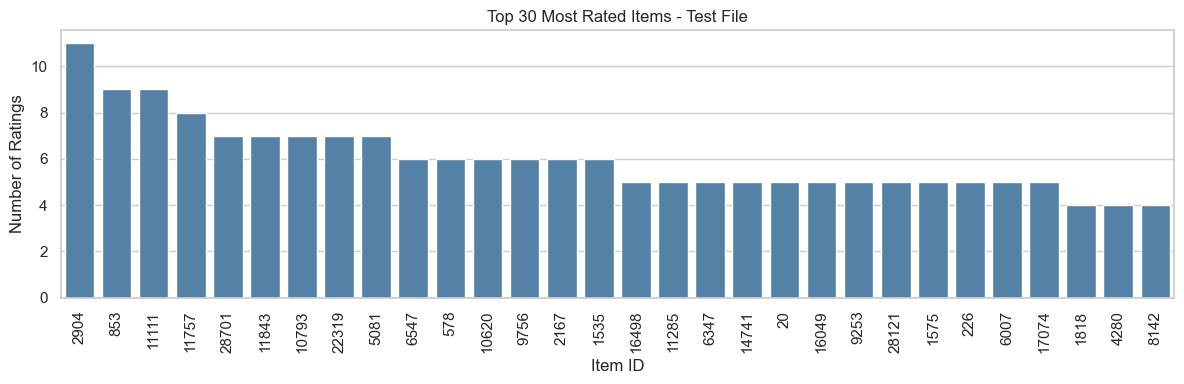

In [25]:
def plot_item_stats(df, name):
    item_counts = df['item_id'].value_counts()

    print(f"{name} - Item Statistics")
    print(f"Total unique items rated: {item_counts.shape[0]}")
    print(f"Average number of ratings per item: {item_counts.mean():.2f}")
    print(f"Median number of ratings per item: {item_counts.median()}")
    print(f"Max ratings for a single item: {item_counts.max()}")
    print()

    top_items = item_counts.head(30)

    plt.figure(figsize=(12, 4))
    sns.barplot(x=top_items.index.astype(str), y=top_items.values, color='steelblue')
    plt.xticks(rotation=90)
    plt.title(f"Top 30 Most Rated Items - {name}")
    plt.xlabel("Item ID")
    plt.ylabel("Number of Ratings")
    plt.tight_layout()
    plt.savefig(f"figures/item_stats_{name.lower().replace(' ', '_')}.png")
    plt.show()

plot_item_stats(train_clean, "Train File")
plot_item_stats(test_clean, "Test File")


Train File - Density (Items per User)
Average # of items rated per user: 1.33
Total items: 3543
Density: 0.04%



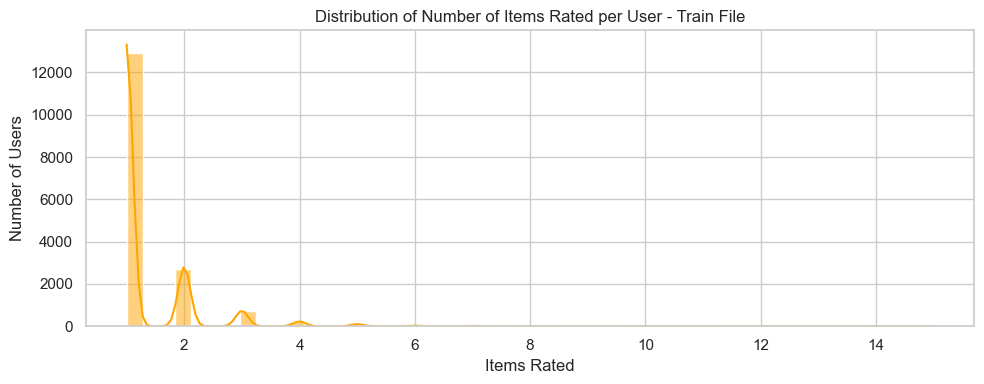

Test File - Density (Items per User)
Average # of items rated per user: 1.12
Total items: 1233
Density: 0.09%



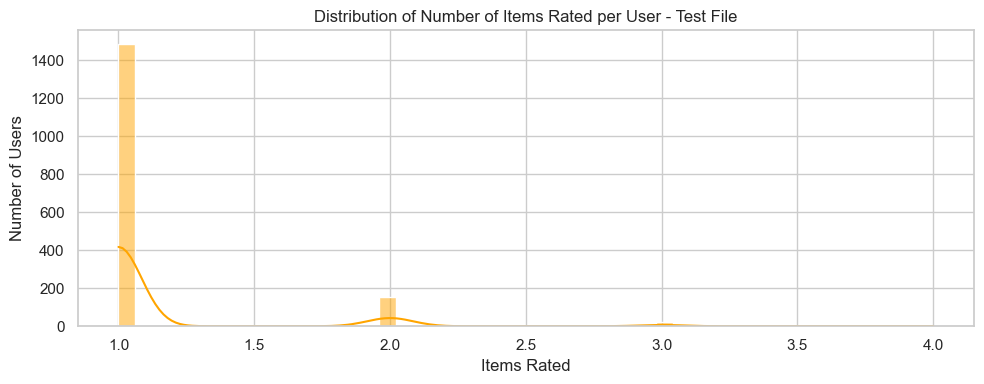

In [26]:
def user_density(df, name):
    user_items = df.groupby('user_id')['item_id'].nunique()
    total_items = df['item_id'].nunique()

    avg_items = user_items.mean()
    density = (avg_items / total_items) * 100

    print(f"{name} - Density (Items per User)")
    print(f"Average # of items rated per user: {avg_items:.2f}")
    print(f"Total items: {total_items}")
    print(f"Density: {density:.2f}%\n")

    plt.figure(figsize=(10, 4))
    sns.histplot(user_items, bins=50, kde=True, color='orange')
    plt.title(f"Distribution of Number of Items Rated per User - {name}")
    plt.xlabel("Items Rated")
    plt.ylabel("Number of Users")
    plt.tight_layout()
    plt.savefig(f"figures/user_density_{name.lower().replace(' ', '_')}.png")
    plt.show()

user_density(train_clean, "Train File")
user_density(test_clean, "Test File")


Train File - Density (Users per Item)
Average # of users per item: 6.28
Total users: 16710
Density: 0.04%



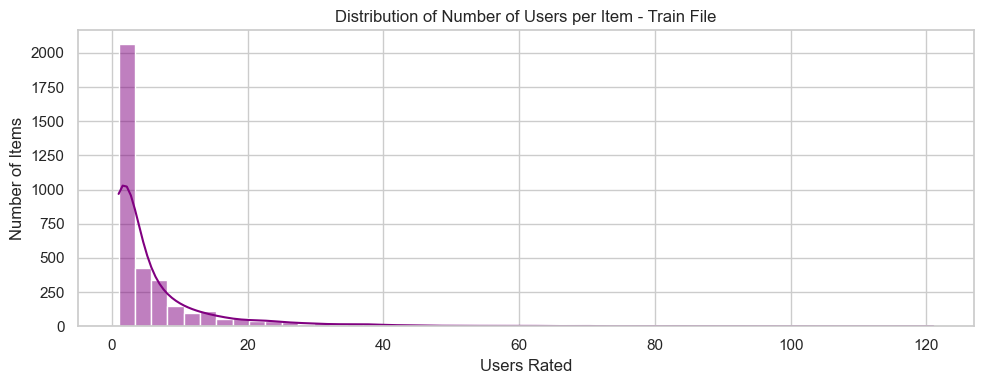

Test File - Density (Users per Item)
Average # of users per item: 1.51
Total users: 1661
Density: 0.09%



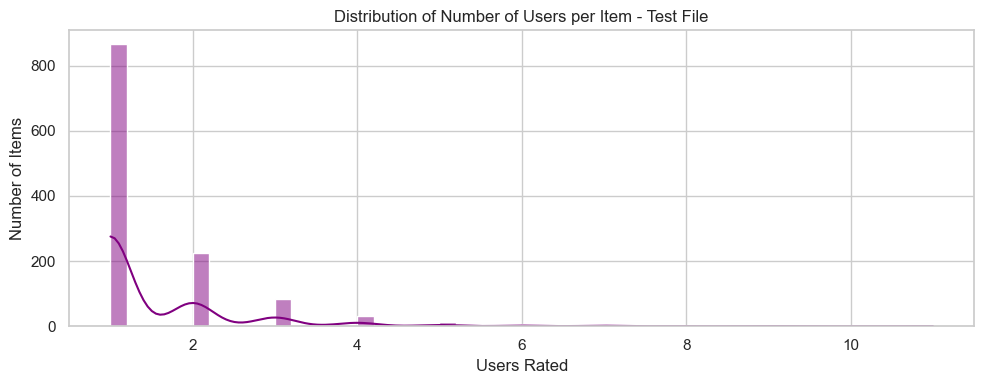

In [27]:
def item_density(df, name):
    item_users = df.groupby('item_id')['user_id'].nunique()
    total_users = df['user_id'].nunique()

    avg_users = item_users.mean()
    density = (avg_users / total_users) * 100

    print(f"{name} - Density (Users per Item)")
    print(f"Average # of users per item: {avg_users:.2f}")
    print(f"Total users: {total_users}")
    print(f"Density: {density:.2f}%\n")

    plt.figure(figsize=(10, 4))
    sns.histplot(item_users, bins=50, kde=True, color='purple')
    plt.title(f"Distribution of Number of Users per Item - {name}")
    plt.xlabel("Users Rated")
    plt.ylabel("Number of Items")
    plt.tight_layout()
    plt.savefig(f"figures/item_density_{name.lower().replace(' ', '_')}.png")
    plt.show()

item_density(train_clean, "Train File")
item_density(test_clean, "Test File")


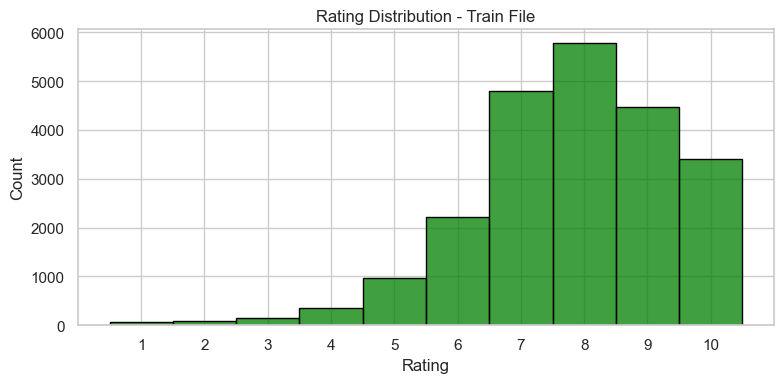

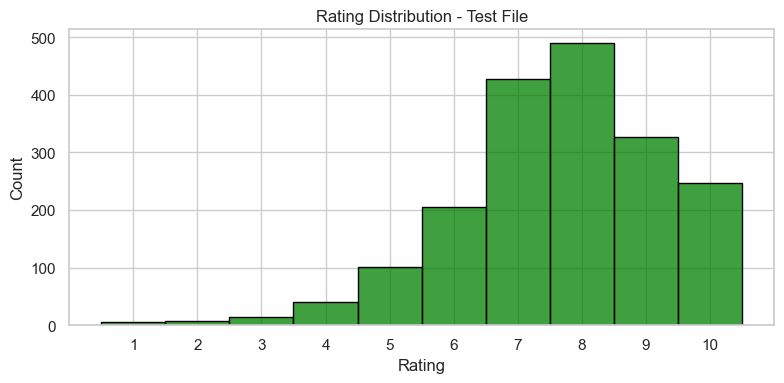

In [28]:
def plot_rating_distribution(df, name):
    plt.figure(figsize=(8, 4))
    sns.histplot(df['rating'], bins=np.arange(1, 12)-0.5, kde=False, color='green', edgecolor='black')
    plt.title(f"Rating Distribution - {name}")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.xticks(np.arange(1, 11))
    plt.tight_layout()
    plt.savefig(f"figures/rating_distribution_{name.lower().replace(' ', '_')}.png")
    plt.show()

plot_rating_distribution(train_clean, "Train File")
plot_rating_distribution(test_clean, "Test File")


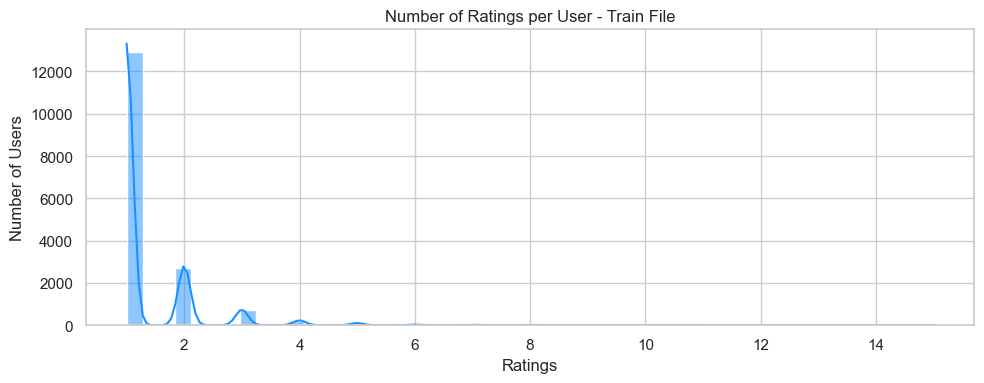

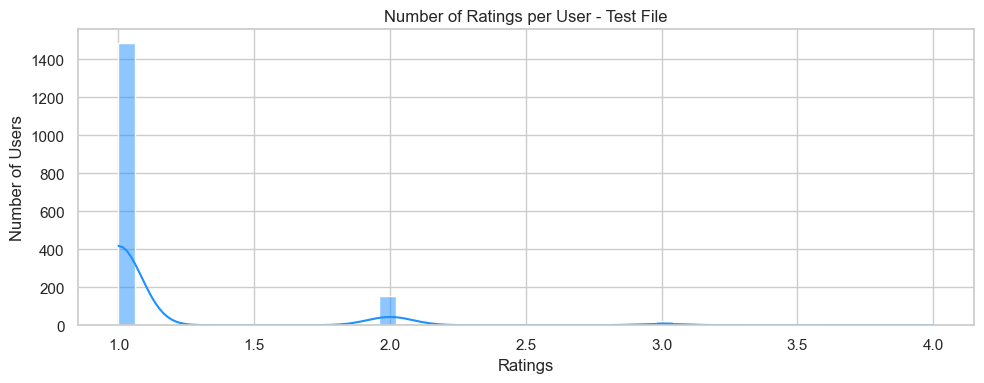

In [29]:
def ratings_per_user(df, name):
    user_ratings = df.groupby('user_id')['rating'].count()

    plt.figure(figsize=(10, 4))
    sns.histplot(user_ratings, bins=50, kde=True, color='dodgerblue')
    plt.title(f"Number of Ratings per User - {name}")
    plt.xlabel("Ratings")
    plt.ylabel("Number of Users")
    plt.tight_layout()
    plt.savefig(f"figures/ratings_per_user_{name.lower().replace(' ', '_')}.png")
    plt.show()

ratings_per_user(train_clean, "Train File")
ratings_per_user(test_clean, "Test File")
